Первый метод K-means


К минс предполагает пересчетов центров кластеров относительно скопления данных и количества самих кластеров

Хорошо работает с пространственной геометрией

файл с облаком /home/sam/python/bmm/cloud0.xyz

Алгоритм подтянем из библиотеки


In [16]:
#установка либ для k_means

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pyvista as pv



посмотрим на данные (расскоментировать)

/home/sam/.local/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


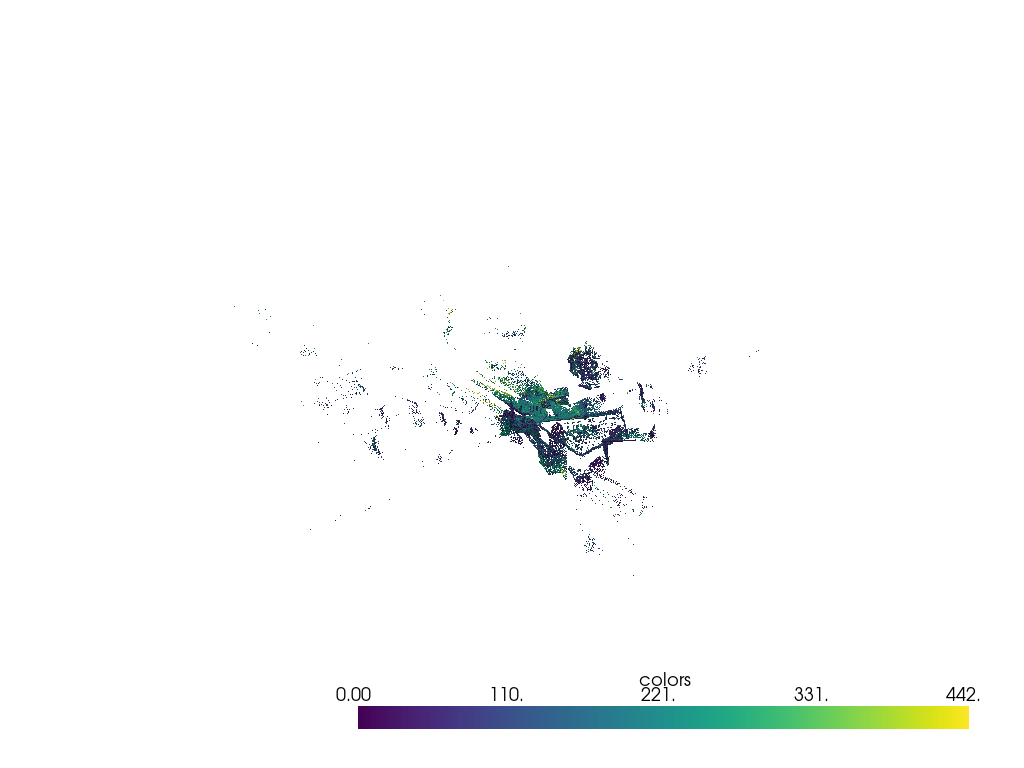

In [17]:
# Загрузка данных из файла с помощью NumPy
filename = '/home/sam/python/bmm/cloud0.xyz'
data = np.genfromtxt(filename, skip_header=1, dtype=float, delimiter=' ', missing_values='NaN')
x, y, z, r, g, b = data[:, 0], data[:, 1], data[:, 2], data[:, 4], data[:, 5], data[:, 6] #тут сразу выкинул столбец №3 с непонятными значениями
points = np.column_stack((x, y, z))
colors = np.column_stack((r, g, b))  
point_cloud = pv.PolyData(points)

point_cloud.point_data['colors'] = colors

plotter = pv.Plotter()
plotter.add_points(point_cloud, render_points_as_spheres=True, point_size=1)
plotter.show()

In [18]:
data_file = '/home/sam/python/bmm/cloud0.xyz'


In [19]:
data = np.loadtxt(data_file, delimiter=' ', dtype=float)

In [20]:
#самостоятельная настройка данных, есть какой-то 7 столбец
df = pd.DataFrame(data, columns=['x', 'y', 'z', 'shit', 'r', 'g', 'b'])
df = df.drop('shit', axis=1)


#в нормальном варианте:
#df = pd.DataFrame(data, columns=['x', 'y', 'z', 'r', 'g', 'b'])



In [21]:
df.head()

,x,y,z,r,g,b
0,20.395,40.359,-2.399,141.0,154.0,173.0
1,20.394,40.357,-2.377,141.0,155.0,168.0
2,20.414,40.356,-2.398,148.0,156.0,179.0
3,20.429,40.345,-2.390,147.0,154.0,172.0
4,20.463,40.336,-2.397,139.0,146.0,162.0


In [22]:
df.shape

(116006, 6)

Данные готовы, создадим и обучим модель

In [23]:
num_clusters = 12 #можно руками настраивать  

selected_columns = ['x', 'y', 'z']
X = df[selected_columns]

kmns = KMeans(n_clusters=num_clusters)
kmns.fit(X)

# Присваиваем метки кластеров каждой точке данных
df['cluster_label'] = kmns.labels_


In [24]:
df.head()

,x,y,z,r,g,b,cluster_label
0,20.395,40.359,-2.399,141.0,154.0,173.0,6
1,20.394,40.357,-2.377,141.0,155.0,168.0,6
2,20.414,40.356,-2.398,148.0,156.0,179.0,6
3,20.429,40.345,-2.390,147.0,154.0,172.0,6
4,20.463,40.336,-2.397,139.0,146.0,162.0,6


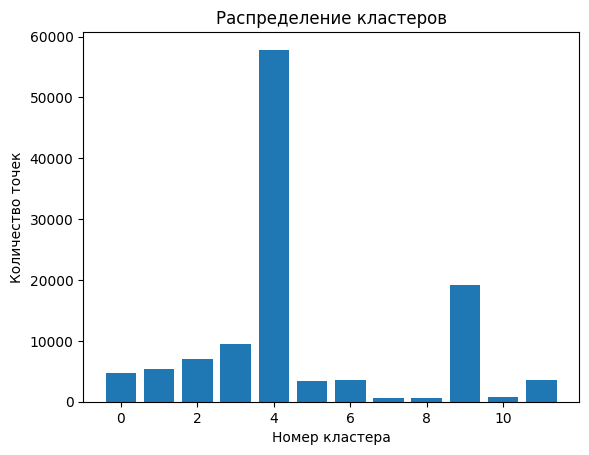

In [25]:
cluster_counts = df['cluster_label'].value_counts().sort_index()

plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Номер кластера')
plt.ylabel('Количество точек')
plt.title('Распределение кластеров')
plt.show()

Кластеризовали по координатам, запустим отрисовку

/home/sam/.local/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


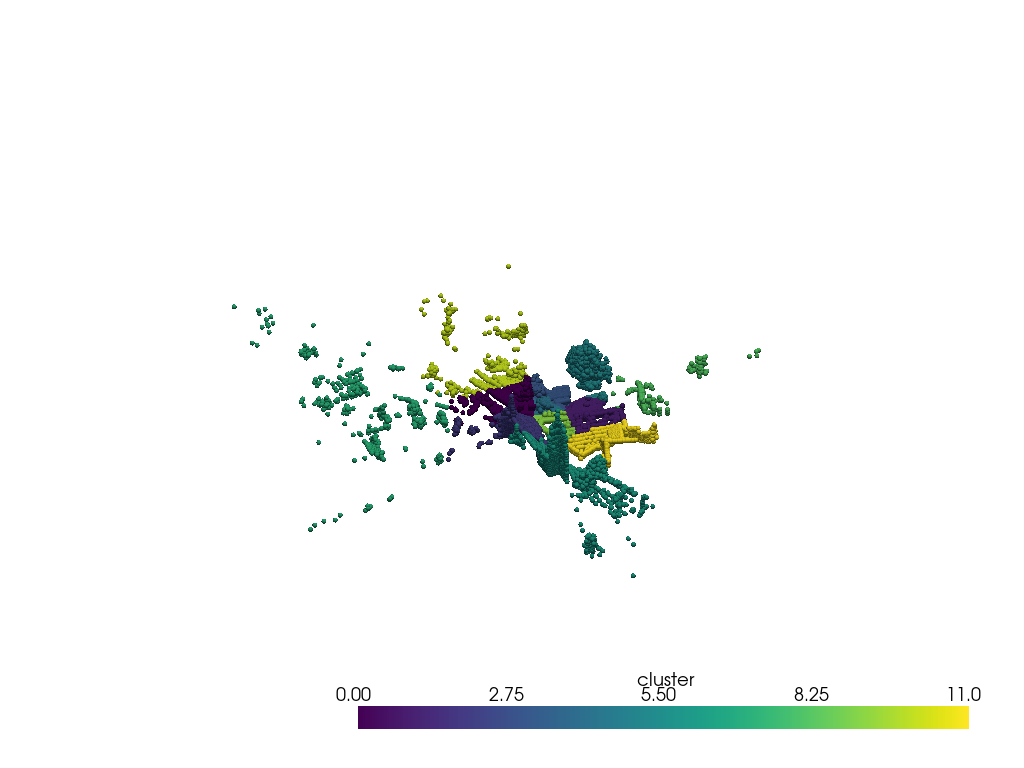

In [26]:
x, y, z, cluster = df['x'], df['y'], df['z'], df['cluster_label']

# Создадим точки
points = np.column_stack((x, y, z))

# Создадим меш
mesh = pv.PolyData(points)

# Добавим информацию о кластерах как массив "cluster"
mesh['cluster'] = cluster

# Создадим интерактивную 3D сцену
p = pv.Plotter()

# Добавим точки с соответствующими цветами для каждого кластера
p.add_points(mesh, scalars='cluster', render_points_as_spheres=True, point_size=5)

# Отобразим окно сцены
p.show()

Ревью по к-минз

1) отличная кластеризация по координатам(суть метода выполнена)
2) отвратительная кластеризация по координатам и цветам
3) быстро работает, алгоритмическая сложность O(n*m), n - количество кластеров, m - количество пересчетов центров кластеров

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) - это алгоритм кластеризации, который ищет области в пространстве данных с высокой плотностью точек и отделяет их от областей с низкой плотностью. Основная идея DBSCAN заключается в том, чтобы сгруппировать точки, находящиеся достаточно близко друг к другу в плоскости данных, в кластеры, основываясь на плотности точек вокруг них. 

Следующий алгоритм кластеризации это dbscan

Данные теже, 
Обучение сначала на xyz, потом на xyzrgb


In [27]:
#установка либ для dbscan

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pyvista as pv

In [28]:
data_file = '/home/sam/python/bmm/cloud0.xyz'
data = np.loadtxt(data_file, delimiter=' ', dtype=float)
df = pd.DataFrame(data, columns=['x', 'y', 'z', 'shit', 'r', 'g', 'b'])
df = df.drop('shit', axis=1)
df.head()

,x,y,z,r,g,b
0,20.395,40.359,-2.399,141.0,154.0,173.0
1,20.394,40.357,-2.377,141.0,155.0,168.0
2,20.414,40.356,-2.398,148.0,156.0,179.0
3,20.429,40.345,-2.390,147.0,154.0,172.0
4,20.463,40.336,-2.397,139.0,146.0,162.0


In [29]:
df.shape

(116006, 6)

In [30]:
data = df[['x', 'y', 'z']].values
data

array([[20.395, 40.359, -2.399],
       [20.394, 40.357, -2.377],
       [20.414, 40.356, -2.398],
       ...,
       [58.485, 77.738, 10.565],
       [40.15 , 81.04 ,  0.812],
       [58.02 , 81.63 ,  9.416]])

Воспользуемся методом локтя для определения оптимального значения гиперпараметра эпсилон

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

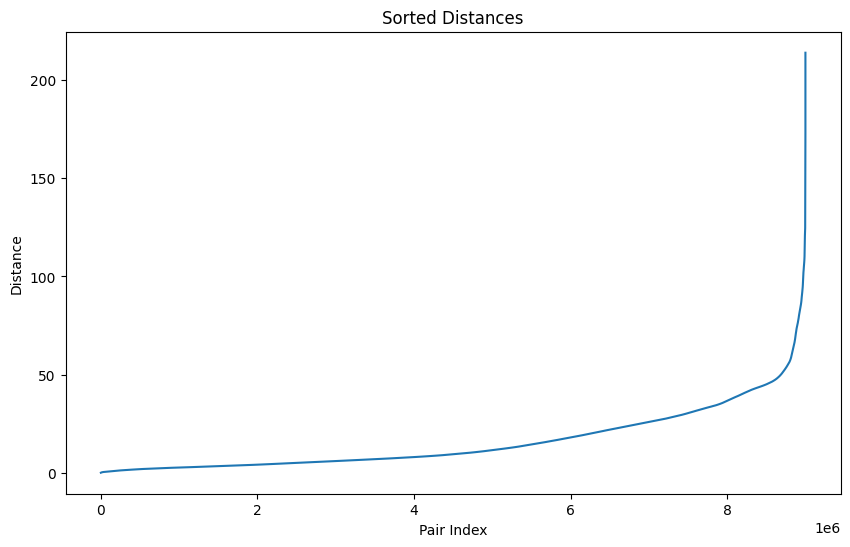

In [32]:
sample_size = 3000 
sample_indices = np.random.choice(len(data), size=sample_size, replace=False)
sample_data = data[sample_indices]

distances = pairwise_distances(sample_data, metric='euclidean')
sorted_distances = np.sort(distances, axis=None)

# график расстояний
plt.figure(figsize=(10, 6))
plt.plot(sorted_distances)
plt.xlabel('Pair Index')
plt.ylabel('Distance')
plt.title('Sorted Distances')
plt.show()

In [33]:
from sklearn.cluster import DBSCAN

In [34]:
dbscan = DBSCAN(eps=0.5, min_samples=25)  #(eps=0.5, min_samples=25) не вылетает

labels = dbscan.fit_predict(data)

<function matplotlib.pyplot.show(close=None, block=None)>

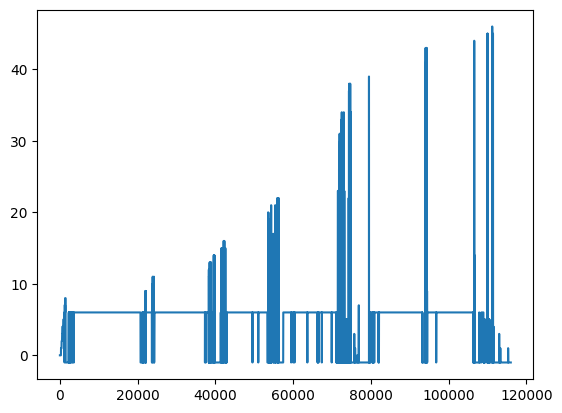

In [35]:
plt.plot(labels)
plt.show


In [36]:
result_df = pd.DataFrame(data, columns=['x', 'y', 'z'])
result_df['cluster_label'] = labels

In [37]:
result_df

,x,y,z,cluster_label
0,20.395,40.359,-2.399,0
1,20.394,40.357,-2.377,0
2,20.414,40.356,-2.398,0
3,20.429,40.345,-2.390,0
4,20.463,40.336,-2.397,0
...,...,...,...,...
116001,54.828,72.124,8.334,-1
116002,55.721,74.609,9.077,-1
116003,58.485,77.738,10.565,-1
116004,40.150,81.040,0.812,-1


/home/sam/.local/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


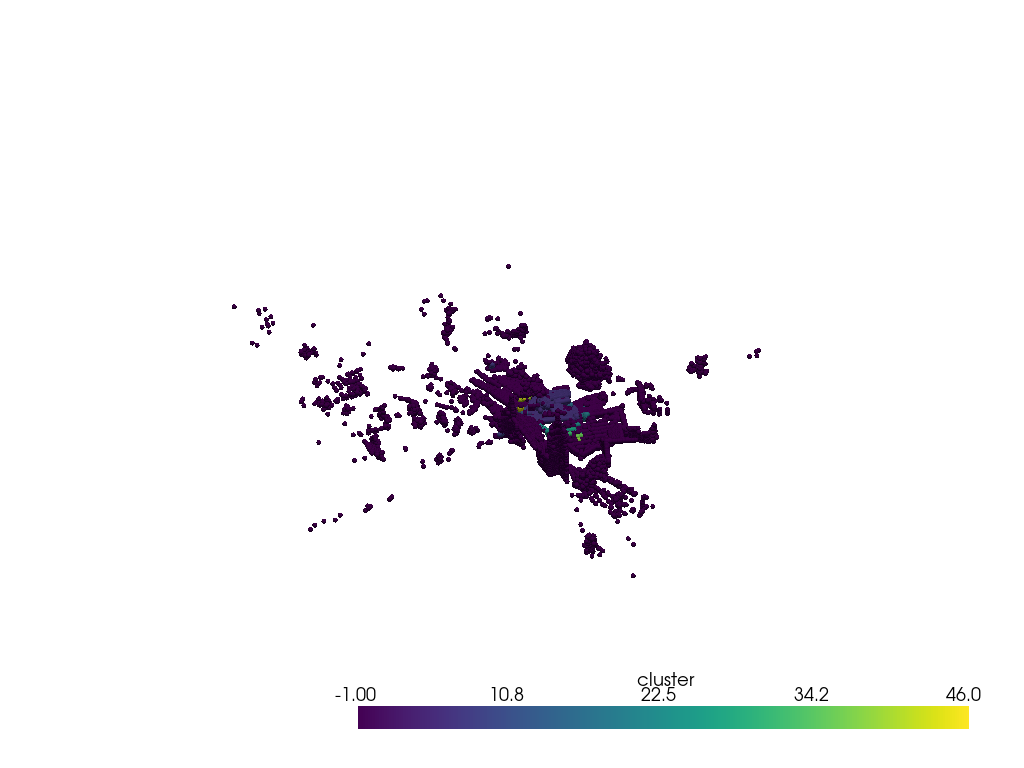

In [38]:
x, y, z, cluster = result_df['x'], result_df['y'], result_df['z'], result_df['cluster_label']

# Создадим точки
points = np.column_stack((x, y, z))

# Создадим меш
mesh = pv.PolyData(points)

# Добавим информацию о кластерах как массив "cluster"
mesh['cluster'] = cluster

# Создадим интерактивную 3D сцену
p = pv.Plotter()

# Добавим точки с соответствующими цветами для каждого кластера
p.add_points(mesh, scalars='cluster', render_points_as_spheres=True, point_size=5)

# Отобразим окно сцены
p.show()

Ревью по DBSCAN

Работает жадно, долго, в облаках точек с большой плотностью требует больших вычислетельных ресурсов. При минимально возможной конфигурации настраеваемых
гиперпараметров выдает большое количество кластеров, которое не имеет практического значения. В целом количество кластеров не настраивается, кроме как 
перебором гиперпараметров

При более тоочной настройке гиперпараметров мы упираемся в алгоритмическую сложность задачи. Увеличивая эпсилон увеличивается число последующих
построений кластеров. Настраивая гиперпараметр min_samples (увеличивая), получаем что большинство точек будут считаться выбросами.


GMM, как положительная демонстрация

In [39]:
from sklearn.mixture import GaussianMixture


In [40]:
data_file = '/home/sam/python/bmm/cloud0.xyz'
data = np.loadtxt(data_file, delimiter=' ', dtype=float)
df = pd.DataFrame(data, columns=['x', 'y', 'z', 'shit', 'r', 'g', 'b'])
df = df.drop('shit', axis=1)
df.head()

,x,y,z,r,g,b
0,20.395,40.359,-2.399,141.0,154.0,173.0
1,20.394,40.357,-2.377,141.0,155.0,168.0
2,20.414,40.356,-2.398,148.0,156.0,179.0
3,20.429,40.345,-2.390,147.0,154.0,172.0
4,20.463,40.336,-2.397,139.0,146.0,162.0


In [41]:
gmm = GaussianMixture(n_components=12, covariance_type='full', random_state=0)
labels = gmm.fit_predict(df)


df['cluster'] = labels

/home/sam/.local/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


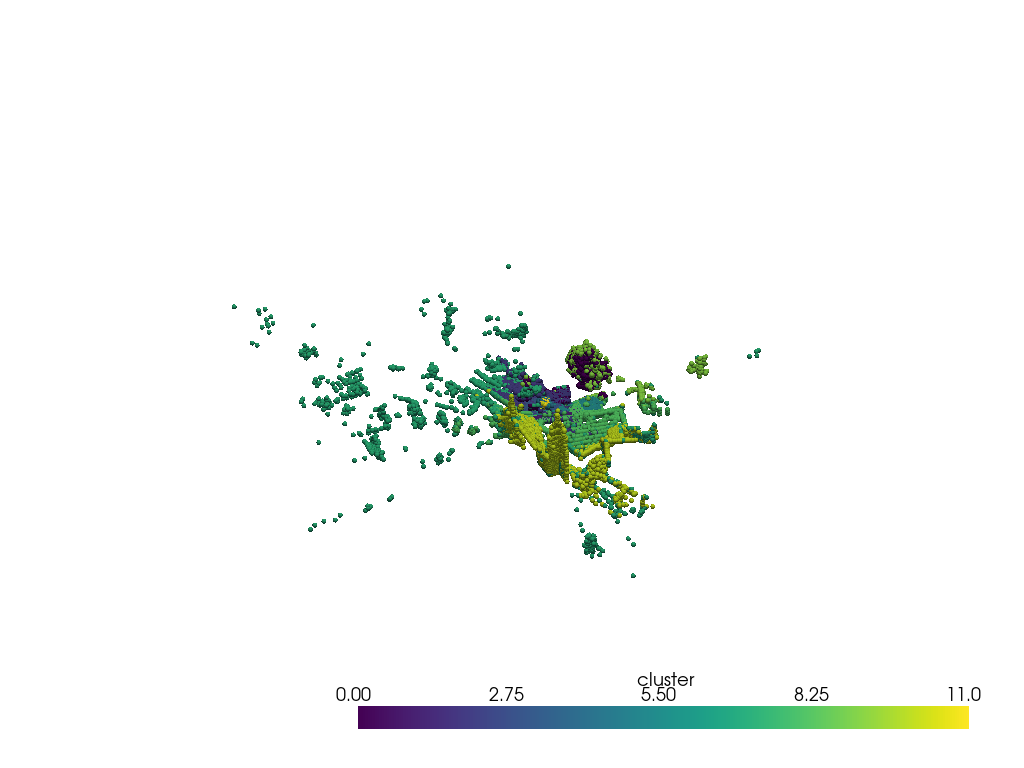

In [42]:
x, y, z, cluster = df['x'], df['y'], df['z'], df['cluster']

# Создадим точки
points = np.column_stack((x, y, z))

# Создадим меш
mesh = pv.PolyData(points)

# Добавим информацию о кластерах как массив "cluster"
mesh['cluster'] = cluster

# Создадим интерактивную 3D сцену
p = pv.Plotter()

# Добавим точки с соответствующими цветами для каждого кластера
p.add_points(mesh, scalars='cluster', render_points_as_spheres=True, point_size=5)

# Отобразим окно сцены
p.show()

Ревью по гмм

как обычно гуд, добавить нечего...

СлЕДУЮЩИЙ Алгоритм это MeanShift (не запускал на локалке, все что дальше в коде можо не смотреть) РЕВЬЮ В САМОМ КОНЦЕ

In [4]:
import numpy as np
from sklearn.cluster import MeanShift

In [5]:
data_file = '/home/sam/python/bmm/cloud0.xyz'
data = np.loadtxt(data_file, delimiter=' ', dtype=float)
df = pd.DataFrame(data, columns=['x', 'y', 'z', 'shit', 'r', 'g', 'b'])
df = df.drop('shit', axis=1)
df.head()

,x,y,z,r,g,b
0,20.395,40.359,-2.399,141.0,154.0,173.0
1,20.394,40.357,-2.377,141.0,155.0,168.0
2,20.414,40.356,-2.398,148.0,156.0,179.0
3,20.429,40.345,-2.390,147.0,154.0,172.0
4,20.463,40.336,-2.397,139.0,146.0,162.0


In [6]:
data = df[['x', 'y', 'z']].values
data

array([[20.395, 40.359, -2.399],
       [20.394, 40.357, -2.377],
       [20.414, 40.356, -2.398],
       ...,
       [58.485, 77.738, 10.565],
       [40.15 , 81.04 ,  0.812],
       [58.02 , 81.63 ,  9.416]])

In [43]:
# НЕ ЗАПУСКАЮ, ТАЧКА СДОХЛА
bandwidth = 2.5  
meanshift = MeanShift(bandwidth=bandwidth)

#clusters = meanshift.fit_predict(data) 

Ревью по "плохим" алгоритмам для облаков точек, где много данных,


в основном упираюсь в ограничение по оперативе,

пробовал dbscan, optics, meanshift в колабе

очень долго это optics, meanshift, даже не понятно на сколько долго....

В Иерархической кластеризации clustering = AgglomerativeClustering(n_clusters=12)
взрыв оперативной памяти, даже с использованием кэширования на диск



Это норм алгосы, но они слишком жадные, как мне кажется, да и большая часть из них долго работает. n^2, а для облака это смертельно

По гмму ждем ревью от Ивана